### Projeto Prático - *Reconhecimento de Dígitos*

Alunos:
- Júlia Moraes da Silva 20230014434
- Luiz Eduardo de Almeida Siqueira Silva 20230014210

#### Importando as bibliotecas

In [107]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample
import matplotlib.pyplot as plt
import pandas as pd
import csv

#### Explicação do Dataset

Cada imagem é composta por 28 linhas e 28 colunas em um total de 784 pixels. Os dados de entrada (treino) possuem 785 colunas, a primeira coluna é chamada "label", identificando o dígito desenhado pelo usuário. O resto das colunas contém os valores de pixels da imagem associada. Cada coluna de pixel nos dados de treino, é nomeada "pixelx" onde x é um inteiro no intervalo [0,783]. Para localizar este pixel na imagem, x foi decomposto como x = i * 28 + j. Onde i e j são inteiros no intervalo [0,27]. 

Vamos inicar importando os csv.

#### Redução da dimensão das amostras 

In [108]:

treino = pd.read_csv('train.csv', sep=';')  
matriz_treino = treino.values


teste = pd.read_csv('test.csv', sep=';')
matriz_teste = teste.values


In [109]:

def acessar_imagem(dataset, indice):
    """
    Acessa uma imagem do dataset e retorna a imagem 28x28 e o label.
    
    Args:
        dataset (numpy.ndarray): O dataset contendo imagens e labels.
        indice (int): O índice da imagem a ser acessada.
    Returns:
        tuple: Uma tupla contendo a imagem 28x28 e o label (ou None se não houver label).
    """

    # Verificar se temos dados válidos
    if dataset.shape[1] >= 785:
    # Dataset com label
        label = dataset[indice, 0] 
        pixels = dataset[indice, 1:785] 
    
        #  Só faz reshape se temos 784 pixels
        if len(pixels) == 784:
            imagem_28x28 = pixels.reshape(28, 28)
        else:
            print(f"ERRO: {len(pixels)} pixels encontrados, esperado 784")
        
    elif dataset.shape[1] == 784:
    # Dataset só com pixels
        pixels = dataset[indice]
        label = None
    
    print(f"Dataset label : {label}")
    print(f"Pixels: {len(pixels)}")
    
    imagem_28x28 = pixels.reshape(28, 28)

    return imagem_28x28, label
    

In [110]:
def visualizar_imagem(imagem_28x28, label):
    """
    Visualiza uma imagem 28x28
    
    Parâmetros:
    - imagem_28x28: matriz 28x28 com os pixels da imagem
    - label: o dígito da imagem 
    
    
    Retorna:
    - imagem plotada com título indicando o dígito (ou 'Imagem do Dataset' se label for None)
    """
    
    if imagem_28x28.shape != (28, 28):
        print(f"ERRO: Formato incorreto {imagem_28x28.shape}. Esperado (28, 28)")
        return None
    
    # Criar título da imagem
    if label is not None:
        titulo = f'Dígito: {label}'
    else:
        titulo = 'Imagem do Dataset'
    
    # Plotar a imagem
    plt.figure(figsize=(6, 6))
    plt.imshow(imagem_28x28, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()
    
    

In [111]:
def intensidade_imagem(imagem):
    """
    Calcula a intensidade de preto de uma imagem.

    l =  ∑ (i=0 até 783)(pixel_i)/255
    
    Parâmetros:
    - imagem: matriz 28x28 com os valores dos pixels
    
    Retorna:
    - intensidade: aproximação da quantidade de pixels pretos na imagem 
    """

    intensidade =  np.sum(imagem)/255
     
    return intensidade
    

In [112]:
def simetria_imagem(imagem):
    """
    Calcula a simetria de uma imagem.

    s_v =  ∑ (i=0 até 27)(j=0 até 13) || pixel_ij - pixel_i(27-j) ||/255

    s_h = ∑ (i=0 até 13)(j=0 até 27) || pixel_ij - pixel_(27-i)j ||/255

    s = s_v + s_h

    Parâmetros:
    - imagem: matriz 28x28 com os valores dos pixels
    
    Retorna:
    - simetria: medida de simetria da imagem 
    """
    s_v = 0
    s_h = 0
    simetria = 0
    for i in range(28):
        for j in range(14):
            s_v += np.abs(imagem[i, j] - imagem[i, 27 - j])

    s_v /= 255

    for i in range(14):
        for j in range(28):
            s_h += np.abs(imagem[i, j] - imagem[27 - i, j])

    s_h /= 255

    simetria = s_v + s_h
    
    return simetria


In [113]:
imagem1, label1 = acessar_imagem(matriz_treino, 0)

Dataset label : 0
Pixels: 784


In [114]:
imagem2, label2 = acessar_imagem(matriz_teste, 800)

Dataset label : 4
Pixels: 784


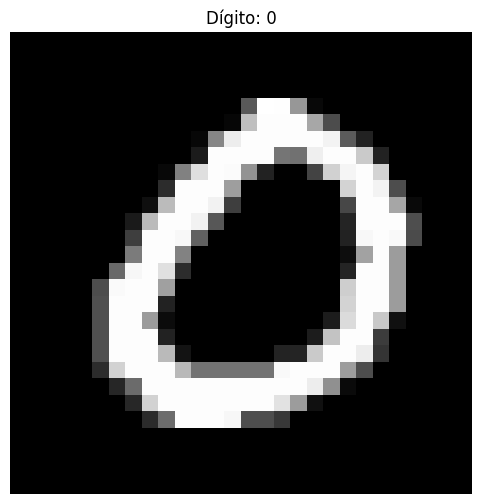

In [115]:
visualizar_imagem(imagem1, label1 )

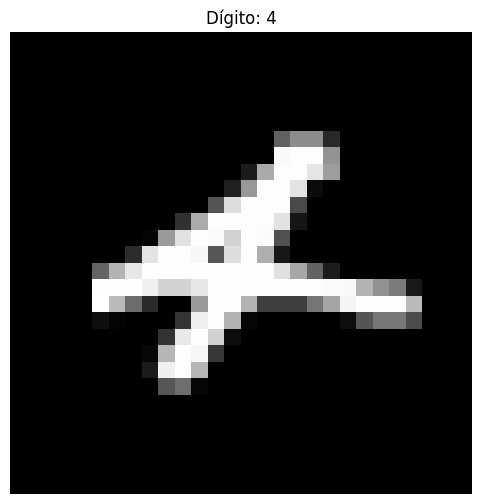

In [116]:
visualizar_imagem(imagem2, label2 )

In [117]:
int1 = intensidade_imagem(imagem1)
int2 = intensidade_imagem(imagem2)

print(f"Intensidade da imagem 1: {int1}")
print(f"Intensidade da imagem 2: {int2}")

sim11 = simetria_imagem(imagem1)
sim21 = simetria_imagem(imagem2)

print(f"Simetria da imagem 1: {sim11}")
print(f"Simetria da imagem 2: {sim21}")

Intensidade da imagem 1: 145.43529411764706
Intensidade da imagem 2: 92.22745098039216
Simetria da imagem 1: 148.57254901960783
Simetria da imagem 2: 101.97647058823529


In [118]:
def informs (dataset, indice):
    """
    Função para extrair informações de uma imagem em um conjunto de dados.
    
    """
    info = []
    
    imagem, label = acessar_imagem(dataset, indice)
    info.append(label)
    intensidade = intensidade_imagem(imagem)
    info.append(intensidade)
    simetria = simetria_imagem(imagem)
    info.append(simetria)
        
    return info


Criando os arquivos com a redução das dimensões das amostras. O primeiro elemento será o label, seguido pela intensidade e pela simetria. Fizemos isso tanto para treino como para teste.

In [119]:
for i in range(len(matriz_treino)):
    dados = informs(matriz_treino, i)
    with open("train_redu.csv", mode="a", newline="", encoding="utf-8") as arquivo:
        escritor = csv.writer(arquivo, delimiter=";")  # separador ;
        escritor.writerow(dados)

Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset la

In [120]:
for i in range(len(matriz_teste)):
    dados = informs(matriz_teste, i)
    with open("test_redu.csv", mode="a", newline="", encoding="utf-8") as arquivo:
        escritor = csv.writer(arquivo, delimiter=";")  # separador ;
        escritor.writerow(dados)

Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset label : 0
Pixels: 784
Dataset la

#### Classificação dos dígitos 1 x 5 

Separando em treino e em teste apenas as imagens com 1 e 5.

In [121]:
with open("train_redu.csv", "r", encoding="utf-8") as arq_entrada, \
    open("train1x5.csv", "w", encoding="utf-8") as arq_saida:

    for linha in arq_entrada:
        parte_1 = linha.split(";")[0] # pega o primeiro elemento

        if parte_1 == "1" or parte_1 == "5":
            arq_saida.write(linha)

In [122]:
with open("test_redu.csv", "r", encoding="utf-8") as arq_entrada, \
    open("test1x5.csv", "w", encoding="utf-8") as arq_saida:

    for linha in arq_entrada:
        parte_1 = linha.split(";")[0] # pega o primeiro elemento

        if parte_1 == "1" or parte_1 == "5":
            arq_saida.write(linha)


In [123]:
dados_label1 = []
dados_label5 = []

with open("train1x5.csv", "r", encoding="utf-8") as arquivo:
    leitor = csv.reader(arquivo, delimiter=";")  # define que o separador é ";"
    
    for label, intensidade, simetria in leitor:
        if label == "1":
            dados_label1.append((float(intensidade), float(simetria)))
        else:
            dados_label5.append((float(intensidade), float(simetria)))

print(dados_label1)
print(dados_label5)

[(44.70196078431373, 69.27058823529413), (59.85098039215686, 83.44313725490196), (48.55294117647059, 79.04313725490195), (69.43529411764706, 72.87843137254902), (51.54117647058823, 84.61176470588235), (46.674509803921566, 80.4), (48.09803921568628, 79.08235294117648), (46.819607843137256, 78.14117647058823), (56.51764705882353, 79.01176470588236), (63.15294117647059, 62.86274509803921), (48.02745098039216, 77.78823529411764), (47.8235294117647, 82.16470588235293), (52.227450980392156, 69.70980392156864), (48.12549019607843, 72.88627450980391), (60.870588235294115, 69.74117647058824), (48.831372549019605, 78.8313725490196), (52.64705882352941, 72.66666666666667), (53.78431372549019, 75.52941176470588), (45.94117647058823, 75.65490196078431), (63.63529411764706, 73.50588235294117), (51.627450980392155, 82.08627450980393), (54.95294117647059, 68.28235294117647), (54.090196078431376, 74.11764705882354), (58.13725490196079, 89.25490196078431), (57.14509803921569, 84.18039215686275), (47.611

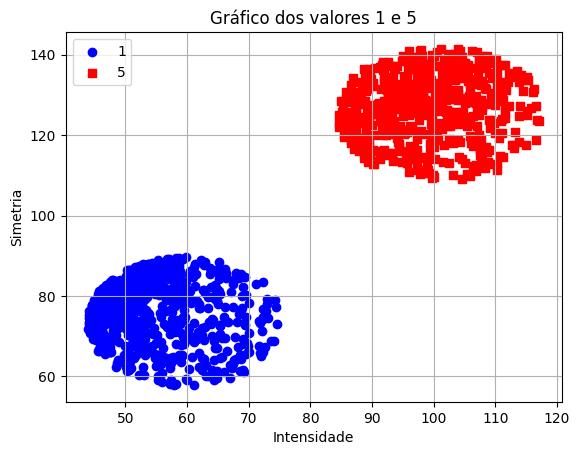

In [124]:
x1 = [p[0] for p in dados_label1]
y1 = [p[1] for p in dados_label1]

x5 = [p[0] for p in dados_label5]
y5 = [p[1] for p in dados_label5]

# Plotar os dois grupos com cores e marcadores diferentes
plt.scatter(x1, y1, color='blue', marker='o', label='1')
plt.scatter(x5, y5, color='red', marker='s', label='5')

plt.title("Gráfico dos valores 1 e 5")
plt.xlabel("Intensidade")
plt.ylabel("Simetria")
plt.legend()
plt.grid(True)
plt.show()